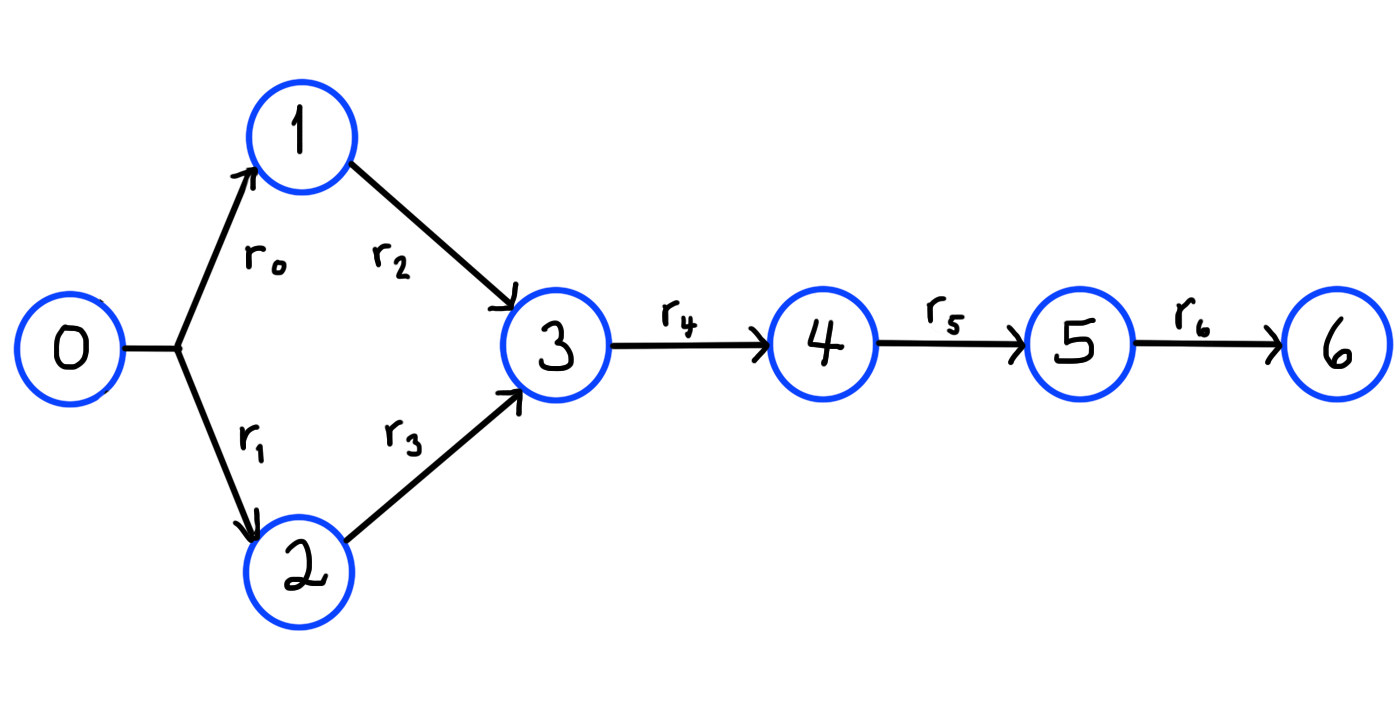

In [1]:
import numpy as np

In [2]:
probToState1 = 0.5
valueEstimates = [0, 3, 8, 2, 1, 2, 0]
rewards = [0, 0, 0, 4, 1, 1, 1]

In [3]:
def R(t):
    if t == 1:
        return probToState1*rewards[0] + (1-probToState1)*rewards[1]
    if t == 2:
        return probToState1*rewards[2] + (1-probToState1)*rewards[3]
    if t+1 < len(rewards):
        return rewards[t+1]
    else:
        return 0

def V(t):
    if t == 0:
        return valueEstimates[0]
    if t == 1:
        return probToState1*valueEstimates[1] + (1-probToState1)*valueEstimates[2]
    if t+1 < len(valueEstimates):
        return valueEstimates[t+1]
    else:
        return 0#valueEstimates[-1]


In [4]:
def E(k):
    estimate = 0
    for i in range(1, k+1):
        if i > 5:
            break
        estimate += R(i)
    estimate += V(k)
    estimate -= V(0)
    return estimate

def TD1():
    return E(10000000)

for i in range(1, 10):
    print(i, E(i))
TD1()

1 5.5
2 4.0
3 4.0
4 6.0
5 5.0
6 5.0
7 5.0
8 5.0
9 5.0


5.0

In [5]:
np.roots([E(6)-E(5), E(5)-E(4), E(4)-E(3), E(3)-E(2), E(2)-E(1), E(1)-TD1()])

array([-0.85463768,  1.45160596,  1.        ,  0.40303172])